<h1>ENB39 - CNNs</h1>
<h2>activation functions </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [4]:
net1 = models.Sequential()

net1.add(layers.Conv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=4))
net1.add(layers.Conv1D(filters = 48, kernel_size=4, activation='relu',))
net1.add(layers.MaxPooling1D(pool_size=4))
net1.add(layers.Flatten())
net1.add(layers.Dense(480, activation = 'relu'))
net1.add(layers.Dense(360, activation = 'relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 473, 96)           4704      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 118, 96)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 115, 48)           18480     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 28, 48)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               645600    
______________________________________

In [13]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [14]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.8148 - val_loss: 0.4608 - val_accuracy: 0.7222
Epoch 2/50
54/54 [==============================] - 0s 831us/step - loss: 0.5893 - accuracy: 0.7222 - val_loss: 0.6522 - val_accuracy: 0.6111
Epoch 3/50
54/54 [==============================] - 0s 834us/step - loss: 0.6784 - accuracy: 0.7222 - val_loss: 0.1683 - val_accuracy: 0.9444
Epoch 4/50
54/54 [==============================] - 0s 853us/step - loss: 0.3934 - accuracy: 0.8519 - val_loss: 0.3969 - val_accuracy: 0.7222
Epoch 5/50
54/54 [==============================] - 0s 816us/step - loss: 0.4212 - accuracy: 0.8519 - val_loss: 0.4430 - val_accuracy: 0.8333
Epoch 6/50
54/54 [==============================] - 0s 834us/step - loss: 0.3338 - accuracy: 0.8519 - val_loss: 0.4515 - val_accuracy: 0.8333
Epoch 7/50
54/54 [==============================] - 0s 871us/step - loss: 0.3241 - accuracy: 0.8519 - va

54/54 [==============================] - 0s 871us/step - loss: 0.0817 - accuracy: 0.9815 - val_loss: 0.3635 - val_accuracy: 0.7778
Epoch 14/50
54/54 [==============================] - 0s 816us/step - loss: 0.1059 - accuracy: 0.9815 - val_loss: 0.0701 - val_accuracy: 1.0000
Epoch 15/50
54/54 [==============================] - 0s 834us/step - loss: 0.0704 - accuracy: 0.9815 - val_loss: 0.1300 - val_accuracy: 0.9444
Epoch 16/50
54/54 [==============================] - 0s 834us/step - loss: 0.0921 - accuracy: 0.9444 - val_loss: 0.0831 - val_accuracy: 1.0000
Epoch 17/50
54/54 [==============================] - 0s 834us/step - loss: 0.0690 - accuracy: 0.9815 - val_loss: 0.1546 - val_accuracy: 0.9444
Epoch 18/50
54/54 [==============================] - 0s 824us/step - loss: 0.0704 - accuracy: 0.9815 - val_loss: 0.2476 - val_accuracy: 0.8889
Epoch 19/50
54/54 [==============================] - 0s 853us/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 20/50

In [15]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.33932671 0.86666667]
Standard deviation for loss & accuracy:  [0.07278296 0.04714045]
Duration in seconds:  9


In [159]:
net1.save('enb39-1.h5')

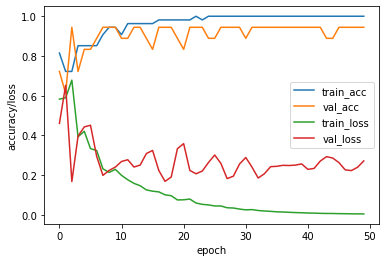

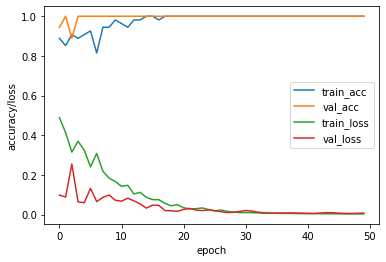

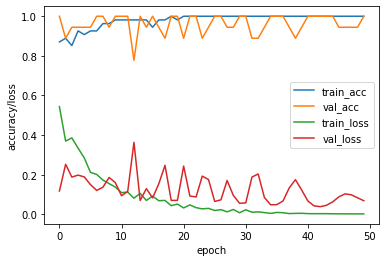

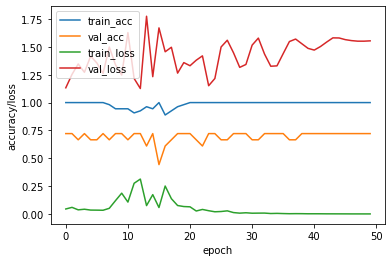

In [16]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [28]:
net2 = models.Sequential()
net2.add(layers.Conv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.Conv1D(filters = 48, kernel_size=4, activation='relu' ))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.Conv1D(filters = 24, kernel_size=2, activation='relu' ))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.Flatten())
net2.add(layers.Dense(144, activation = 'relu'))
net2.add(layers.Dense(64, activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 473, 96)           4704      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 118, 96)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 115, 48)           18480     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 28, 48)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 27, 24)            2328      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 6, 24)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)              

In [40]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [41]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 200, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 5ms/step - loss: 1.0429 - accuracy: 0.7593 - val_loss: 0.6343 - val_accuracy: 0.8333
Epoch 2/200
54/54 [==============================] - 0s 604us/step - loss: 0.7974 - accuracy: 0.7407 - val_loss: 1.1245 - val_accuracy: 0.5556
Epoch 3/200
54/54 [==============================] - 0s 597us/step - loss: 1.1889 - accuracy: 0.6852 - val_loss: 0.1570 - val_accuracy: 0.8889
Epoch 4/200
54/54 [==============================] - 0s 575us/step - loss: 0.4473 - accuracy: 0.8704 - val_loss: 0.6801 - val_accuracy: 0.5556
Epoch 5/200
54/54 [==============================] - 0s 593us/step - loss: 0.7972 - accuracy: 0.7037 - val_loss: 0.9265 - val_accuracy: 0.6111
Epoch 6/200
54/54 [==============================] - 0s 593us/step - loss: 0.7024 - accuracy: 0.6481 - val_loss: 0.4528 - val_accuracy: 0.7222
Epoch 7/200
54/54 [==============================] - 0s 612us/step - loss: 0.4621 - accuracy: 0.83

Epoch 114/200
54/54 [==============================] - 0s 599us/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9444
Epoch 115/200
54/54 [==============================] - 0s 575us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9444
Epoch 116/200
54/54 [==============================] - 0s 593us/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9444
Epoch 117/200
54/54 [==============================] - 0s 553us/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9444
Epoch 118/200
54/54 [==============================] - 0s 593us/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9444
Epoch 119/200
54/54 [==============================] - 0s 575us/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9444
Epoch 120/200
54/54 [==============================] - 0s 606us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0889 - val_ac

Epoch 26/200
54/54 [==============================] - 0s 575us/step - loss: 0.1083 - accuracy: 0.9630 - val_loss: 0.1020 - val_accuracy: 1.0000
Epoch 27/200
54/54 [==============================] - 0s 593us/step - loss: 0.1156 - accuracy: 0.9630 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 28/200
54/54 [==============================] - 0s 575us/step - loss: 0.0823 - accuracy: 0.9815 - val_loss: 0.2034 - val_accuracy: 0.8889
Epoch 29/200
54/54 [==============================] - 0s 556us/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 1.0000
Epoch 30/200
54/54 [==============================] - 0s 575us/step - loss: 0.0695 - accuracy: 0.9815 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 31/200
54/54 [==============================] - 0s 593us/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 1.0000
Epoch 32/200
54/54 [==============================] - 0s 575us/step - loss: 0.0591 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy:

Epoch 83/200
54/54 [==============================] - 0s 593us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 84/200
54/54 [==============================] - 0s 575us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 85/200
54/54 [==============================] - 0s 556us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 86/200
54/54 [==============================] - 0s 538us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 87/200
54/54 [==============================] - 0s 556us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 88/200
54/54 [==============================] - 0s 575us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 89/200
54/54 [==============================] - 0s 575us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy:

54/54 [==============================] - 0s 556us/step - loss: 8.6290e-04 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 196/200
54/54 [==============================] - 0s 575us/step - loss: 8.5867e-04 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 197/200
54/54 [==============================] - 0s 558us/step - loss: 8.4333e-04 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 198/200
54/54 [==============================] - 0s 556us/step - loss: 8.3961e-04 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 199/200
54/54 [==============================] - 0s 556us/step - loss: 8.3219e-04 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 200/200
15/15 [==============================] - 0s 200us/step
[0.2767934501171112, 0.9333333373069763]
2
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 593us/step - loss: 0.4408 - accuracy: 0.8704 - val_loss: 

Epoch 51/200
54/54 [==============================] - 0s 575us/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9444
Epoch 52/200
54/54 [==============================] - 0s 556us/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 1.0000
Epoch 53/200
54/54 [==============================] - 0s 556us/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 1.0000
Epoch 54/200
54/54 [==============================] - 0s 556us/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 0.9444
Epoch 55/200
54/54 [==============================] - 0s 556us/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.1302 - val_accuracy: 0.9444
Epoch 56/200
54/54 [==============================] - 0s 556us/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9444
Epoch 57/200
54/54 [==============================] - 0s 556us/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy:

Epoch 108/200
54/54 [==============================] - 0s 575us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2140 - val_accuracy: 0.8889
Epoch 109/200
54/54 [==============================] - 0s 556us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2135 - val_accuracy: 0.8889
Epoch 110/200
54/54 [==============================] - 0s 593us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2163 - val_accuracy: 0.8889
Epoch 111/200
54/54 [==============================] - 0s 575us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2250 - val_accuracy: 0.8889
Epoch 112/200
54/54 [==============================] - 0s 593us/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.8889
Epoch 113/200
54/54 [==============================] - 0s 575us/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2293 - val_accuracy: 0.8889
Epoch 114/200
54/54 [==============================] - 0s 575us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2254 - val_ac

Epoch 20/200
54/54 [==============================] - 0s 575us/step - loss: 0.6045 - accuracy: 0.6667 - val_loss: 1.0738 - val_accuracy: 0.7222
Epoch 21/200
54/54 [==============================] - 0s 593us/step - loss: 0.2024 - accuracy: 0.9259 - val_loss: 2.1663 - val_accuracy: 0.3889
Epoch 22/200
54/54 [==============================] - 0s 577us/step - loss: 0.5025 - accuracy: 0.7778 - val_loss: 1.3624 - val_accuracy: 0.7222
Epoch 23/200
54/54 [==============================] - 0s 593us/step - loss: 0.1366 - accuracy: 1.0000 - val_loss: 1.1700 - val_accuracy: 0.7222
Epoch 24/200
54/54 [==============================] - 0s 593us/step - loss: 0.3832 - accuracy: 0.8704 - val_loss: 1.1956 - val_accuracy: 0.6111
Epoch 25/200
54/54 [==============================] - 0s 575us/step - loss: 0.1618 - accuracy: 0.9444 - val_loss: 1.2257 - val_accuracy: 0.6111
Epoch 26/200
54/54 [==============================] - 0s 593us/step - loss: 0.1261 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy:

Epoch 77/200
54/54 [==============================] - 0s 575us/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.3582 - val_accuracy: 0.7222
Epoch 78/200
54/54 [==============================] - 0s 575us/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.4150 - val_accuracy: 0.7222
Epoch 79/200
54/54 [==============================] - 0s 556us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.4406 - val_accuracy: 0.7222
Epoch 80/200
54/54 [==============================] - 0s 556us/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 1.4057 - val_accuracy: 0.7222
Epoch 81/200
54/54 [==============================] - 0s 556us/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.3894 - val_accuracy: 0.7222
Epoch 82/200
54/54 [==============================] - 0s 575us/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.4705 - val_accuracy: 0.7222
Epoch 83/200
54/54 [==============================] - 0s 575us/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.5709 - val_accuracy:

54/54 [==============================] - 0s 575us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7243 - val_accuracy: 0.7222
Epoch 190/200
54/54 [==============================] - 0s 575us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7370 - val_accuracy: 0.7222
Epoch 191/200
54/54 [==============================] - 0s 593us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7528 - val_accuracy: 0.7222
Epoch 192/200
54/54 [==============================] - 0s 575us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7682 - val_accuracy: 0.7222
Epoch 193/200
54/54 [==============================] - 0s 593us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7664 - val_accuracy: 0.7222
Epoch 194/200
54/54 [==============================] - 0s 575us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7630 - val_accuracy: 0.7222
Epoch 195/200
54/54 [==============================] - 0s 575us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.7473 - val_accuracy: 0.7222

In [42]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.19170302 0.93333334]
Standard deviation for loss & accuracy:  [0.09035781 0.04714045]
Duration in seconds:  27


In [43]:
net2.save('enb38-2.h5')

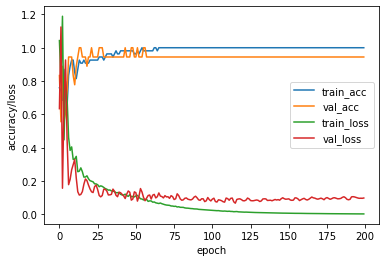

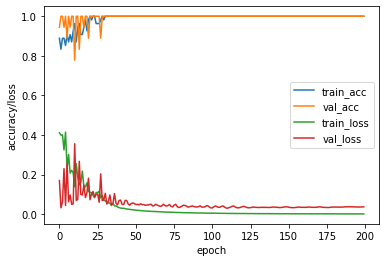

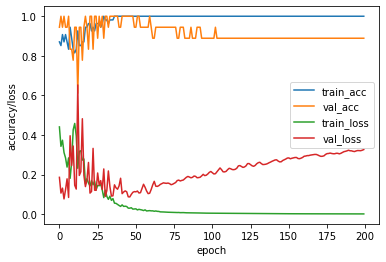

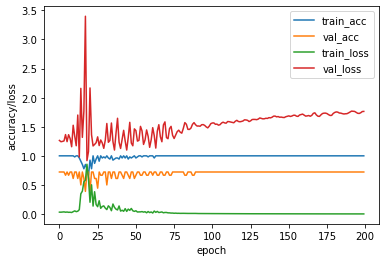

In [44]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [50]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.Conv1D(filters = 48, kernel_size=4, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.Conv1D(filters = 24, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.Flatten())
net3.add(layers.Dense(144, activation = 'relu'))
net3.add(layers.Dense(64, activation = 'relu'))
net3.add(layers.Dense(32, activation = 'relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 473, 96)           4704      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 118, 96)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 115, 48)           18480     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 28, 48)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 27, 24)            2328      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 6, 24)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 144)              

In [51]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 200, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 6ms/step - loss: 1.9520 - accuracy: 0.0370 - val_loss: 1.9495 - val_accuracy: 0.0556
Epoch 2/200
54/54 [==============================] - 0s 854us/step - loss: 1.9356 - accuracy: 0.1852 - val_loss: 1.9290 - val_accuracy: 0.2778
Epoch 3/200
54/54 [==============================] - 0s 593us/step - loss: 1.9237 - accuracy: 0.2407 - val_loss: 1.9134 - val_accuracy: 0.2778
Epoch 4/200
54/54 [==============================] - 0s 575us/step - loss: 1.9021 - accuracy: 0.3889 - val_loss: 1.8870 - val_accuracy: 0.3333
Epoch 5/200
54/54 [==============================] - 0s 575us/step - loss: 1.8743 - accuracy: 0.2963 - val_loss: 1.8551 - val_accuracy: 0.2778
Epoch 6/200
54/54 [==============================] - 0s 593us/step - loss: 1.8389 - accuracy: 0.2593 - val_loss: 1.8122 - val_accuracy: 0.2778
Epoch 7/200
54/54 [==============================] - 0s 593us/step - loss: 1.7921 - accuracy: 0.25

Epoch 114/200
54/54 [==============================] - 0s 569us/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.5084 - val_accuracy: 0.7778
Epoch 115/200
54/54 [==============================] - 0s 593us/step - loss: 0.0636 - accuracy: 0.9815 - val_loss: 0.5283 - val_accuracy: 0.7778
Epoch 116/200
54/54 [==============================] - 0s 586us/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.7778
Epoch 117/200
54/54 [==============================] - 0s 575us/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.5401 - val_accuracy: 0.8333
Epoch 118/200
54/54 [==============================] - 0s 579us/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.5157 - val_accuracy: 0.7778
Epoch 119/200
54/54 [==============================] - 0s 556us/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.5058 - val_accuracy: 0.7778
Epoch 120/200
54/54 [==============================] - 0s 575us/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.5008 - val_ac

Epoch 26/200
54/54 [==============================] - 0s 593us/step - loss: 0.6052 - accuracy: 0.7407 - val_loss: 0.4640 - val_accuracy: 0.9444
Epoch 27/200
54/54 [==============================] - 0s 593us/step - loss: 0.5583 - accuracy: 0.7037 - val_loss: 0.4980 - val_accuracy: 0.8889
Epoch 28/200
54/54 [==============================] - 0s 593us/step - loss: 0.5313 - accuracy: 0.7778 - val_loss: 0.4541 - val_accuracy: 0.9444
Epoch 29/200
54/54 [==============================] - 0s 630us/step - loss: 0.4837 - accuracy: 0.8704 - val_loss: 0.4368 - val_accuracy: 0.9444
Epoch 30/200
54/54 [==============================] - 0s 630us/step - loss: 0.5085 - accuracy: 0.7963 - val_loss: 0.3795 - val_accuracy: 0.9444
Epoch 31/200
54/54 [==============================] - 0s 816us/step - loss: 0.4726 - accuracy: 0.8333 - val_loss: 0.3997 - val_accuracy: 0.8333
Epoch 32/200
54/54 [==============================] - 0s 630us/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.3129 - val_accuracy:

Epoch 83/200
54/54 [==============================] - 0s 596us/step - loss: 0.0817 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 593us/step - loss: 0.0878 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 612us/step - loss: 0.0935 - accuracy: 0.9630 - val_loss: 0.2577 - val_accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 593us/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.2830 - val_accuracy: 0.8889
Epoch 87/200
54/54 [==============================] - 0s 575us/step - loss: 0.0788 - accuracy: 1.0000 - val_loss: 0.1752 - val_accuracy: 0.8889
Epoch 88/200
54/54 [==============================] - 0s 575us/step - loss: 0.1388 - accuracy: 0.9259 - val_loss: 0.2475 - val_accuracy: 0.9444
Epoch 89/200
54/54 [==============================] - 0s 593us/step - loss: 0.0892 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy:

54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3550 - val_accuracy: 0.8333
Epoch 196/200
54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.8333
Epoch 197/200
54/54 [==============================] - 0s 575us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3593 - val_accuracy: 0.8333
Epoch 198/200
54/54 [==============================] - 0s 593us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3937 - val_accuracy: 0.8333
Epoch 199/200
54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 200/200
15/15 [==============================] - 0s 200us/step
[0.09134892374277115, 0.9333333373069763]
2
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 612us/step - loss: 1.9612 - accuracy: 0.0000e+00 - val_loss: 1.9389 - val_ac

Epoch 51/200
54/54 [==============================] - 0s 612us/step - loss: 0.4949 - accuracy: 0.7778 - val_loss: 1.1669 - val_accuracy: 0.5556
Epoch 52/200
54/54 [==============================] - 0s 612us/step - loss: 0.4256 - accuracy: 0.8519 - val_loss: 1.1935 - val_accuracy: 0.4444
Epoch 53/200
54/54 [==============================] - 0s 612us/step - loss: 0.4369 - accuracy: 0.7778 - val_loss: 1.3800 - val_accuracy: 0.3333
Epoch 54/200
54/54 [==============================] - 0s 630us/step - loss: 0.4637 - accuracy: 0.7593 - val_loss: 1.0806 - val_accuracy: 0.6667
Epoch 55/200
54/54 [==============================] - 0s 630us/step - loss: 0.4537 - accuracy: 0.8148 - val_loss: 1.3619 - val_accuracy: 0.5000
Epoch 56/200
54/54 [==============================] - 0s 630us/step - loss: 0.4125 - accuracy: 0.8333 - val_loss: 1.0427 - val_accuracy: 0.7778
Epoch 57/200
54/54 [==============================] - 0s 630us/step - loss: 0.4215 - accuracy: 0.8333 - val_loss: 1.1380 - val_accuracy:

Epoch 108/200
54/54 [==============================] - 0s 593us/step - loss: 0.1510 - accuracy: 0.9444 - val_loss: 1.1479 - val_accuracy: 0.7222
Epoch 109/200
54/54 [==============================] - 0s 593us/step - loss: 0.1456 - accuracy: 0.9444 - val_loss: 1.1524 - val_accuracy: 0.6667
Epoch 110/200
54/54 [==============================] - 0s 575us/step - loss: 0.1597 - accuracy: 0.9074 - val_loss: 1.1369 - val_accuracy: 0.6667
Epoch 111/200
54/54 [==============================] - 0s 593us/step - loss: 0.1486 - accuracy: 0.8889 - val_loss: 1.1546 - val_accuracy: 0.6667
Epoch 112/200
54/54 [==============================] - 0s 593us/step - loss: 0.1462 - accuracy: 0.9259 - val_loss: 1.1129 - val_accuracy: 0.7222
Epoch 113/200
54/54 [==============================] - 0s 593us/step - loss: 0.1541 - accuracy: 0.9074 - val_loss: 1.1364 - val_accuracy: 0.6667
Epoch 114/200
54/54 [==============================] - 0s 598us/step - loss: 0.1927 - accuracy: 0.9259 - val_loss: 1.1391 - val_ac

Epoch 20/200
54/54 [==============================] - 0s 575us/step - loss: 1.5641 - accuracy: 0.4444 - val_loss: 1.8443 - val_accuracy: 0.1111
Epoch 21/200
54/54 [==============================] - 0s 556us/step - loss: 1.5121 - accuracy: 0.4815 - val_loss: 1.7976 - val_accuracy: 0.1111
Epoch 22/200
54/54 [==============================] - 0s 575us/step - loss: 1.4407 - accuracy: 0.4815 - val_loss: 1.6900 - val_accuracy: 0.3333
Epoch 23/200
54/54 [==============================] - 0s 576us/step - loss: 1.3744 - accuracy: 0.6296 - val_loss: 1.6941 - val_accuracy: 0.3333
Epoch 24/200
54/54 [==============================] - 0s 556us/step - loss: 1.2987 - accuracy: 0.5926 - val_loss: 1.5746 - val_accuracy: 0.3333
Epoch 25/200
54/54 [==============================] - 0s 575us/step - loss: 1.2090 - accuracy: 0.5926 - val_loss: 1.6223 - val_accuracy: 0.3333
Epoch 26/200
54/54 [==============================] - 0s 575us/step - loss: 1.1223 - accuracy: 0.6296 - val_loss: 1.6048 - val_accuracy:

Epoch 77/200
54/54 [==============================] - 0s 575us/step - loss: 0.2561 - accuracy: 0.9259 - val_loss: 1.9435 - val_accuracy: 0.3889
Epoch 78/200
54/54 [==============================] - 0s 593us/step - loss: 0.2778 - accuracy: 0.9259 - val_loss: 1.4069 - val_accuracy: 0.6667
Epoch 79/200
54/54 [==============================] - 0s 593us/step - loss: 0.2650 - accuracy: 0.8519 - val_loss: 1.7348 - val_accuracy: 0.5000
Epoch 80/200
54/54 [==============================] - 0s 612us/step - loss: 0.2238 - accuracy: 0.9630 - val_loss: 1.4160 - val_accuracy: 0.6667
Epoch 81/200
54/54 [==============================] - 0s 593us/step - loss: 0.2598 - accuracy: 0.8889 - val_loss: 1.7258 - val_accuracy: 0.5000
Epoch 82/200
54/54 [==============================] - 0s 575us/step - loss: 0.2173 - accuracy: 0.9074 - val_loss: 1.6554 - val_accuracy: 0.5556
Epoch 83/200
54/54 [==============================] - 0s 593us/step - loss: 0.1436 - accuracy: 0.9815 - val_loss: 1.4174 - val_accuracy:

54/54 [==============================] - 0s 593us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.9117 - val_accuracy: 0.6667
Epoch 190/200
54/54 [==============================] - 0s 575us/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.9452 - val_accuracy: 0.6111
Epoch 191/200
54/54 [==============================] - 0s 578us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.9936 - val_accuracy: 0.6111
Epoch 192/200
54/54 [==============================] - 0s 593us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.0125 - val_accuracy: 0.6111
Epoch 193/200
54/54 [==============================] - 0s 575us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.9788 - val_accuracy: 0.6111
Epoch 194/200
54/54 [==============================] - 0s 593us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.9569 - val_accuracy: 0.6111
Epoch 195/200
54/54 [==============================] - 0s 578us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.9574 - val_accuracy: 0.6111

In [52]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.32473172 0.86666667]
Standard deviation for loss & accuracy:  [0.16685649 0.04714045]
Duration in seconds:  28


In [43]:
net3.save('enb38-3.h5')

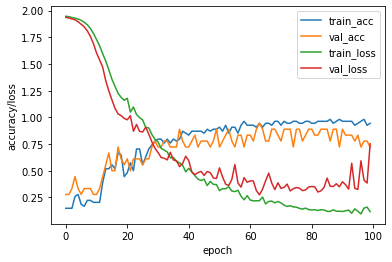

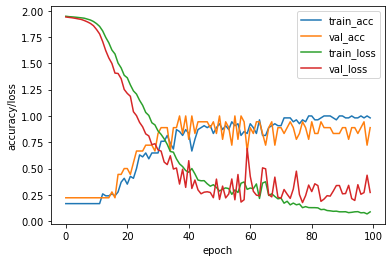

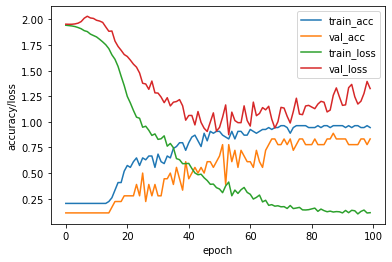

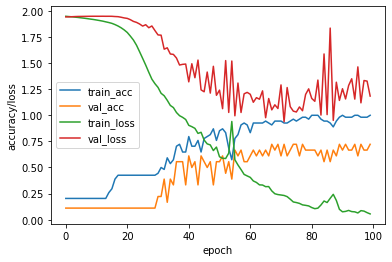

In [49]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [47]:
net4 = models.Sequential()
net4.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net4.add(layers.MaxPooling1D(pool_size=16))
net4.add(layers.Flatten())
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 29, 48)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1392)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 9751      
Total params: 10,375
Trainable params: 10,375
Non-trainable params: 0
_________________________________________________________________


In [48]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 1.9719 - accuracy: 0.0926 - val_loss: 1.9109 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 0s 222us/step - loss: 1.9261 - accuracy: 0.1667 - val_loss: 1.8722 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 0s 222us/step - loss: 1.8957 - accuracy: 0.1667 - val_loss: 1.8404 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 0s 222us/step - loss: 1.8631 - accuracy: 0.1667 - val_loss: 1.8222 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 0s 222us/step - loss: 1.8472 - accuracy: 0.1852 - val_loss: 1.8040 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 0s 204us/step - loss: 1.8348 - accuracy: 0.1852 - val_loss: 1.7850 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 0s 222us/step - loss: 1.8176 - accuracy: 0.18

54/54 [==============================] - 0s 222us/step - loss: 1.7580 - accuracy: 0.4074 - val_loss: 1.6930 - val_accuracy: 0.4444
Epoch 14/100
54/54 [==============================] - 0s 222us/step - loss: 1.7390 - accuracy: 0.3519 - val_loss: 1.6826 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 0s 204us/step - loss: 1.7188 - accuracy: 0.3889 - val_loss: 1.6700 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 0s 204us/step - loss: 1.7005 - accuracy: 0.3519 - val_loss: 1.6555 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 0s 204us/step - loss: 1.6786 - accuracy: 0.3704 - val_loss: 1.6379 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 0s 204us/step - loss: 1.6536 - accuracy: 0.4074 - val_loss: 1.6149 - val_accuracy: 0.5556
Epoch 19/100
54/54 [==============================] - 0s 222us/step - loss: 1.6313 - accuracy: 0.4815 - val_loss: 1.5940 - val_accuracy: 0.6111
Epoch

Epoch 70/100
54/54 [==============================] - 0s 204us/step - loss: 0.7206 - accuracy: 0.8148 - val_loss: 0.8008 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 0s 204us/step - loss: 0.7123 - accuracy: 0.8333 - val_loss: 0.7988 - val_accuracy: 0.9444
Epoch 72/100
54/54 [==============================] - 0s 204us/step - loss: 0.7063 - accuracy: 0.8333 - val_loss: 0.7936 - val_accuracy: 0.9444
Epoch 73/100
54/54 [==============================] - 0s 204us/step - loss: 0.6962 - accuracy: 0.9074 - val_loss: 0.7802 - val_accuracy: 0.9444
Epoch 74/100
54/54 [==============================] - 0s 222us/step - loss: 0.6877 - accuracy: 0.9444 - val_loss: 0.7675 - val_accuracy: 1.0000
Epoch 75/100
54/54 [==============================] - 0s 204us/step - loss: 0.6788 - accuracy: 0.9444 - val_loss: 0.7620 - val_accuracy: 1.0000
Epoch 76/100
54/54 [==============================] - 0s 222us/step - loss: 0.6725 - accuracy: 0.9444 - val_loss: 0.7530 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 222us/step - loss: 1.4435 - accuracy: 0.5556 - val_loss: 1.7980 - val_accuracy: 0.3333
Epoch 27/100
54/54 [==============================] - 0s 224us/step - loss: 1.4228 - accuracy: 0.5185 - val_loss: 1.7838 - val_accuracy: 0.2778
Epoch 28/100
54/54 [==============================] - 0s 222us/step - loss: 1.4008 - accuracy: 0.5185 - val_loss: 1.7665 - val_accuracy: 0.3333
Epoch 29/100
54/54 [==============================] - 0s 204us/step - loss: 1.3801 - accuracy: 0.5370 - val_loss: 1.7489 - val_accuracy: 0.3333
Epoch 30/100
54/54 [==============================] - 0s 222us/step - loss: 1.3584 - accuracy: 0.5926 - val_loss: 1.7304 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 0s 222us/step - loss: 1.3378 - accuracy: 0.5926 - val_loss: 1.7122 - val_accuracy: 0.3333
Epoch 32/100
54/54 [==============================] - 0s 204us/step - loss: 1.3182 - accuracy: 0.5926 - val_loss: 1.6937 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 204us/step - loss: 0.6795 - accuracy: 0.8704 - val_loss: 0.9508 - val_accuracy: 0.6111
Epoch 84/100
54/54 [==============================] - 0s 204us/step - loss: 0.6696 - accuracy: 0.8704 - val_loss: 0.9402 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 0s 222us/step - loss: 0.6616 - accuracy: 0.8889 - val_loss: 0.9334 - val_accuracy: 0.6111
Epoch 86/100
54/54 [==============================] - 0s 204us/step - loss: 0.6565 - accuracy: 0.8889 - val_loss: 0.9286 - val_accuracy: 0.6111
Epoch 87/100
54/54 [==============================] - 0s 204us/step - loss: 0.6488 - accuracy: 0.8889 - val_loss: 0.9279 - val_accuracy: 0.6111
Epoch 88/100
54/54 [==============================] - 0s 204us/step - loss: 0.6451 - accuracy: 0.8889 - val_loss: 0.9201 - val_accuracy: 0.5556
Epoch 89/100
54/54 [==============================] - 0s 222us/step - loss: 0.6360 - accuracy: 0.8889 - val_loss: 0.9122 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 204us/step - loss: 1.1775 - accuracy: 0.6111 - val_loss: 1.4586 - val_accuracy: 0.2778
Epoch 40/100
54/54 [==============================] - 0s 204us/step - loss: 1.1557 - accuracy: 0.6296 - val_loss: 1.4466 - val_accuracy: 0.2778
Epoch 41/100
54/54 [==============================] - 0s 204us/step - loss: 1.1369 - accuracy: 0.6296 - val_loss: 1.4362 - val_accuracy: 0.3333
Epoch 42/100
54/54 [==============================] - 0s 204us/step - loss: 1.1150 - accuracy: 0.6481 - val_loss: 1.4186 - val_accuracy: 0.3333
Epoch 43/100
54/54 [==============================] - 0s 222us/step - loss: 1.0969 - accuracy: 0.6481 - val_loss: 1.4013 - val_accuracy: 0.3333
Epoch 44/100
54/54 [==============================] - 0s 204us/step - loss: 1.0765 - accuracy: 0.6481 - val_loss: 1.3918 - val_accuracy: 0.3333
Epoch 45/100
54/54 [==============================] - 0s 204us/step - loss: 1.0583 - accuracy: 0.6481 - val_loss: 1.3758 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 222us/step - loss: 0.4832 - accuracy: 0.9630 - val_loss: 0.9937 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 204us/step - loss: 0.4769 - accuracy: 1.0000 - val_loss: 0.9931 - val_accuracy: 0.6111
Epoch 98/100
54/54 [==============================] - 0s 204us/step - loss: 0.4707 - accuracy: 1.0000 - val_loss: 0.9825 - val_accuracy: 0.6111
Epoch 99/100
54/54 [==============================] - 0s 204us/step - loss: 0.4636 - accuracy: 1.0000 - val_loss: 0.9790 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 67us/step
[0.6206331253051758, 0.800000011920929]


In [49]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.61883736 0.80000001]
Standard deviation for loss & accuracy:  [0.05631711 0.04714045]
Duration in seconds:  5


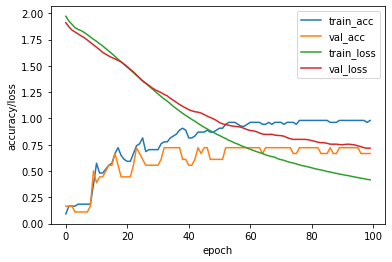

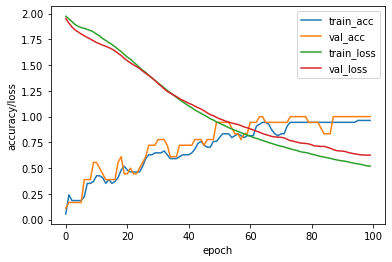

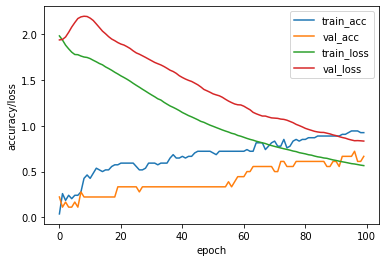

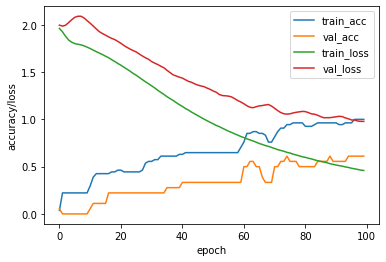

In [50]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
